<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week3_MLE_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222
# Fitting MLEs 



## MLE

We have previously discussed obtaining an MLE of a distribution's parameters via the following rough scheme:

1. Start with set of observations $\{x_k\}, k = 1,..., N$ wich are IID.
2. Assume the distribution of the random varianbes $X_k= X$ is $f_X(X; \mathbf{\theta})$ where $\mathbf{\theta} = (\theta_1, \theta_2,..., \theta_m)$ is a set of (unknown) parameters.
3. We seek to find the parameters that maximize the joint PDF evaluated at the obserevation vector $\mathbf{x} = (x_1,x_2, ..., x_N)$  That is, we seek find  $$\hat{\mathbf{\theta}} = \underset{\mathbf{\theta}}{\mathrm{argmax}}\left(f_{\mathbf{X}}(\mathbf{X}; \mathbf{\theta})\right)$$

4. Observe that this is equivalalent to finding $$\hat{\mathbf{\theta}} = \underset{\mathbf{\theta}}{\mathrm{argmax}}\left(\ell(\mathbf{X};\mathbf{\theta})   \right)$$  where $$\ell(\mathbf{X};\mathbf{\theta}) = \ln\left(f_{\mathbf{X}}(\mathbf{X}; \mathbf{\theta}) \right)$$

5. $\ln\left(f_{\mathbf{X}}(\mathbf{X}; \mathbf{\theta}) \right) = \sum_{k=1}^N \ln(f_X(x_k;\mathbf{\theta})$ so in order to maximize, we find were the gradient (with repect to $\mathbf{\theta}$) is zero. That is, we want to solve the system:

$$\sum_{k=1}^N \frac{\partial}{\partial \theta_j}\ln(f_X(x_k;\mathbf{\theta}) = 0$$ for $k = 1,..., m$



In the example we gave, where $X$ was from the log-normal distribution, we were readily able to do this using just algrebra.  In other common cases, normal, exponential and some others, this is also the case.

But the truth is that as distributions become more complicated, this is more reasonably done numerically. In, that is typically the *only* way. 


Fortunately, with the software available to us, this is not that bad. 



## Example

We will take 10 years of S&P500 daily log-returns and fit them to the student t using MLE. 

In what follows, we will

1. Get data
2. Find the MLE for student t usiing scipy optimize
3. Use the fit method from scipy.stats
4. Compare with a moment match and KDE


In [ ]:
## Get the data


import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
SP500 = yf.Ticker("^GSPC").history(start = "2012-01-01", end = "2022-01-01")

In [ ]:
SP500["logClose"] = np.log(SP500.Close)

SP500["R_log"] = SP500.logClose.diff()

SP500 = SP500.dropna()

SP500


,Open,High,Low,Close,Volume,Dividends,Stock Splits,logClose,R_log
Date,,,,,,,,,
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,3592580000,0,0,7.152504,0.000188
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,4315950000,0,0,7.155443,0.002939
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,3656830000,0,0,7.152903,-0.002540
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,3371600000,0,0,7.155162,0.002259
2012-01-10,1280.770020,1296.459961,1280.770020,1292.079956,4221960000,0,0,7.164009,0.008847
...,...,...,...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,2264120000,0,0,8.474534,0.013744
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,2217050000,0,0,8.473523,-0.001011
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,2369370000,0,0,8.474924,0.001401


In [ ]:
from scipy.optimize import minimize
import scipy.stats as ss

2. Fit using scipy optimize

In [ ]:
x = SP500.R_log


llh = lambda theta: ss.t.logpdf(x,df=theta[2], loc= theta[0],scale= theta[1] ).sum()
theta0 = np.array([0,1,20])  # inital guess for location, scale, and df.  Often, these are obtained via moments

minimize(lambda theta: -llh(theta), theta0)  # We minimze the *negative* log-liklihood to maximize



      fun: nan
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([nan, nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 448
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([ 5.68540016e-01, -1.03323964e+03,  2.06458492e+01])

OK, well that didn't work.  After some fussing with some of the options to no avail, we switch to a more robust method that doesn't rely on calculating the gradient (such methods are slower generally speaking, but these are common tradeoffs).

In [ ]:
minimize(lambda theta: -llh(theta), theta0, method  ='Nelder-Mead')  # We minimze the *negative* log-liklihood to maximize

 final_simplex: (array([[8.92859376e-04, 5.60980415e-03, 2.59700318e+00],
       [8.92872519e-04, 5.60986979e-03, 2.59708374e+00],
       [8.92858884e-04, 5.60982794e-03, 2.59709799e+00],
       [8.92943510e-04, 5.60981447e-03, 2.59702113e+00]]), array([-8434.100116  , -8434.10011599, -8434.10011589, -8434.10011585]))
           fun: -8434.100115996618
       message: 'Optimization terminated successfully.'
          nfev: 391
           nit: 217
        status: 0
       success: True
             x: array([8.92859376e-04, 5.60980415e-03, 2.59700318e+00])

In [ ]:
output = minimize(lambda theta: -llh(theta), theta0, method  ='Nelder-Mead')

print("the MLE df is ",output.x[2] )
print("the MLE location is ",output.x[0] )
print("the MLE scale is ",output.x[1] )


the MLE df is  2.5970031772019926
the MLE location is  0.0008928593760875012
the MLE scale is  0.005609804150923295


We now just use the fit method built in to scipy.stats

In [ ]:
params = ss.t.fit(x)
params

(2.597067171157577, 0.0008929027875559444, 0.005609827322984689)

We can see that these agree with the previous optimization.

 We next compute the Moment Match estimates.
 
 Recall that the excess kurtosis for the t -dist is $EK = \frac{6}{4-\nu}$. Location and scale don't chance the kurtosis, so we first solve
 
 

In [ ]:
dfMM = 4 + 6/x.kurt()
dfMM

4.273185445548164

We next note that if the scale is $\eta$,  the variance satisfies $\mathrm{Var}(X) = \eta^2 \frac{\nu}{\nu -2}$

Hence, we estimate the scale $\eta = \sqrt{ \mathrm{Var}(X) \frac{\nu-2}{\nu}}$



In [ ]:
scaleMM = x.std()*np.sqrt((dfMM -2)/dfMM)

scaleMM


0.007541434772582233

Finally, location is just the mean (in this case)

In [ ]:
locMM = x.mean()
locMM

0.0005234437899103714

Now we make some plots to compare with the data.

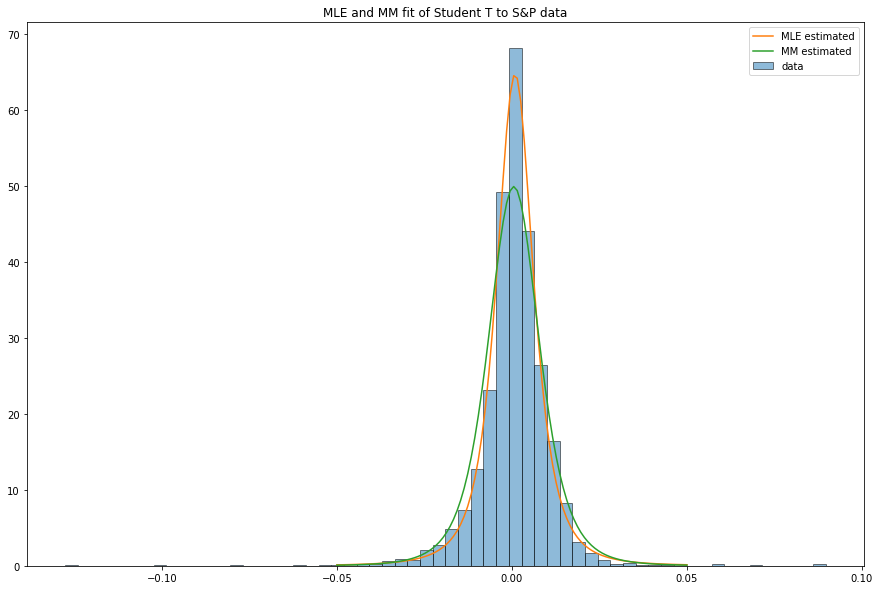

In [ ]:
y = np.linspace(-.05, .05,100)
plt.figure(figsize = (15,10))

plt.hist(x, bins=60,alpha = .5, edgecolor = "black", density = True, label = "data")

plt.plot(y, ss.t.pdf(y, df = params[0], loc = params[1], scale= params[2]), label="MLE estimated" )


plt.plot(y, ss.t.pdf(y, df = dfMM, loc = locMM, scale= scaleMM), label="MM estimated" )

plt.legend()

plt.title("MLE and MM fit of Student T to S&P data")

plt.show()

Recall that another visual way to compare is via the QQ plot

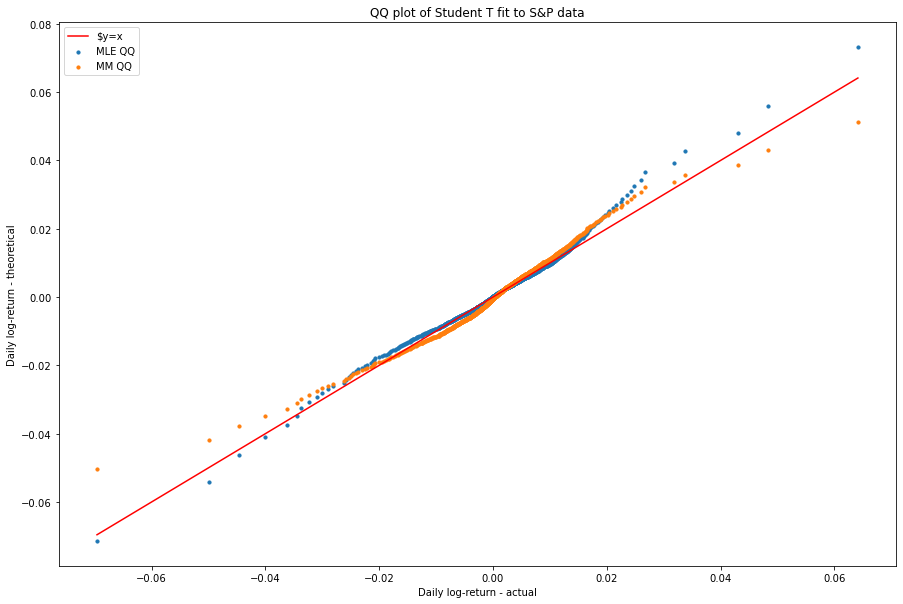

In [ ]:
qs = np.linspace(0.001,.999, 1000)

plt.figure(figsize = (15,10))

plt.scatter( np.quantile(x, qs),ss.t.ppf(qs, df = params[0], loc = params[1], scale= params[2]), label="MLE QQ", s =10)

plt.scatter( np.quantile(x, qs),ss.t.ppf(qs, df = dfMM, loc = locMM, scale= scaleMM), label="MM QQ", s= 10)

plt.plot(np.quantile(x, qs),np.quantile(x, qs), c= 'r', label = "$y=x")

plt.legend()
plt.xlabel("Daily log-return - actual")

plt.ylabel("Daily log-return - theoretical")
plt.title("QQ plot of Student T fit to S&P data")

plt.show()

In [ ]:
llh = lambda theta: ss.t.logpdf(x,df=theta[2], loc= theta[0],scale= theta[1] ).sum()

In [ ]:
from scipy.special import digamma, gamma

def gradlogpdf(x, df, loc, scale):
    
    #Gradient wrt to parameters.  x is a given.
    
    y = (x-loc)/scale
    
   
    
    v1 = -(df+1)/2 * (2*y/df)/(1+y**2/df)*(-1)/scale
    
    
    v2 = -1/scale - (df+1)/2 * (2*y/df)/(1+y**2/df)* (-(x-loc)/scale**2)
    
    v3 = .5*digamma((df+1)/2) - 1/(2*df) -0.5*digamma(df/2) - 0.5*np.log(1+y**2/df) - \
         (df+1)/2*(-y**2)/(df**2 + df*y**2)
    
    
    
    
    return np.array([v1,v2,v3])
    
    
    

In [ ]:
jacobian = lambda theta: -gradlogpdf(x, theta[2],theta[0],theta[1]).sum(axis = 1)

In [ ]:
gradlogpdf(1.2, 5,7,2.5)

array([-0.04447376, -0.53629219,  0.84419787])

In [ ]:
h = .0001
(ss.t.logpdf(1.2, df = 5+h, loc = 10, scale =2) - ss.t.logpdf(1.2, df = 5-h, loc = 10, scale =2))/(2*h)

-0.30509112734389277

In [ ]:
h = .0001
(ss.t.logpdf(1.2, df = 5, loc = 3.5+h, scale =2) - ss.t.logpdf(1.2, df = 5, loc = 3.5-h, scale =2))/(2*h)

-0.5456702252315537

In [ ]:
h = .0001
(ss.t.logpdf(1.2, df = 5, loc = 7, scale =2.5+h) - ss.t.logpdf(1.2, df = 5, loc = 7, scale =2.5-h))/(2*h)

0.8441978747164569

In [ ]:
-gradlogpdf(x, 5,7,2.5).sum(axis = 1)

array([ 1316.8058474 , -2680.37888117,   239.95264235])

In [ ]:
#guess = np.array([output.x[0] , output.x[1] ,output.x[2] ])

guess = np.array([.00082, output.x[1] ,dfMM ])



minimize(lambda theta: -llh(theta), guess, jac = jacobian ) 

      fun: -8434.100116024903
 hess_inv: array([[1.92464548e-08, 2.35858596e-10, 2.72330968e-07],
       [2.35858596e-10, 2.46096744e-08, 1.73459540e-05],
       [2.72330968e-07, 1.73459540e-05, 2.73546701e-02]])
      jac: array([-1.12157068e-07, -1.22029996e-06,  6.31246166e-10])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 13
     njev: 24
   status: 0
  success: True
        x: array([8.92864307e-04, 5.60983667e-03, 2.59703990e+00])

In [ ]:
minimize(lambda theta: -llh(theta), guess ) 

      fun: -8434.10011602017
 hess_inv: array([[ 2.27868374e-08, -1.63662785e-10,  5.40893654e-07],
       [-1.63662785e-10,  2.43089531e-08,  1.80738644e-05],
       [ 5.40893654e-07,  1.80738644e-05,  2.95046473e-02]])
      jac: array([ 0.140625  , -0.1953125 ,  0.00048828])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 244
      nit: 10
     njev: 58
   status: 2
  success: False
        x: array([8.92859451e-04, 5.60982355e-03, 2.59703524e+00])

In [ ]:
minimize(lambda theta: -llh(theta), guess, method = "Powell") 

   direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: 10971.65664787975
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 3010
     nit: 74
  status: 1
 success: False
       x: array([2.58845179e+00, 9.84096712e-01, 6.07417771e+06])

In [ ]:
locMM

0.0005234437899103714

In [ ]:
scaleMM

0.007541434772582233